# Đồ án môn Programming for Data Science

### Sinh viên
    1.18120210            Phạm Tống Bình Minh
    2.18120209            Phạm Nhật Minh

## Import LIB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

## Display setting

In [2]:

pd.set_option('max_colwidth', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)


## Data reading

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploration

In [5]:
df.shape

(7043, 21)

### Dữ liệu có các dòng bị lặp không?

In [6]:
df.duplicated().sum()

0

### Xem ý nghĩa của các cột

### Xem tỉ lệ dữ liệu bị thiếu

In [7]:
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)

In [8]:
missing = df.agg(missing_ratio)
missing[missing > 0]

Series([], dtype: float64)

### Xem kiểu dữ liệu của các cột

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### chuyển cột "TotalCharges" từ object thành float64

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#### check lại tỉ lệ bị thiếu

In [11]:
missing = df.agg(missing_ratio)
missing[missing > 0]

TotalCharges    0.2
dtype: float64

#### Nhận xét:

    + Vì dữ liệu bị thiếu không nhiều và dữ liệu còn lại khá lớn nên ta xóa các dòng bị khuyết

In [12]:
df.dropna(inplace= True)

## Preprocessing

### Với mỗi cột có kiểu dữ liệu có dạng số, các giá trị được phân bố như thế nào?

In [13]:
num_cols = df.select_dtypes(include = 'number').columns
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [14]:

def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25).round(1)
def median(df):
    return df.quantile(0.5).round(1)
def upper_quartile(df):
    return df.quantile(0.75).round(1)

In [15]:
df[num_cols].agg([min,lower_quartile, median, upper_quartile,max])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
min,0.0,1.0,18.25,18.8
lower_quartile,0.0,9.0,35.60,401.4
median,0.0,29.0,70.40,1397.5
upper_quartile,0.0,55.0,89.90,3794.7
max,1.0,72.0,118.75,8684.8


##### Nhận xét:
    + Các cột giá trị số không có gì khác thường

### Với mỗi cột có kiểu dữ liệu có dạng số, các giá trị được phân bố như thế nào?

In [16]:
object_cols = df.select_dtypes(exclude = ['number']).columns

In [17]:
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100)[0:5].round(3))
df[object_cols].agg([num_values, value_ratios])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
num_values,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
value_ratios,"{'2369-FEVNO': 0.014, '3800-LYTRK': 0.014, '6100-FJZDG': 0.014, '9512-UIBFX': 0.014, '2040-LDIWQ': 0.014}","{'Male': 50.469, 'Female': 49.531}","{'No': 51.749, 'Yes': 48.251}","{'No': 70.151, 'Yes': 29.849}","{'Yes': 90.33, 'No': 9.67}","{'No': 48.137, 'Yes': 42.193, 'No phone service': 9.67}","{'Fiber optic': 44.027, 'DSL': 34.357, 'No': 21.615}","{'No': 49.73, 'Yes': 28.655, 'No internet service': 21.615}","{'No': 43.899, 'Yes': 34.485, 'No internet service': 21.615}","{'No': 43.999, 'Yes': 34.386, 'No internet service': 21.615}","{'No': 49.374, 'Yes': 29.01, 'No internet service': 21.615}","{'No': 39.946, 'Yes': 38.439, 'No internet service': 21.615}","{'No': 39.548, 'Yes': 38.837, 'No internet service': 21.615}","{'Month-to-month': 55.105, 'Two year': 23.962, 'One year': 20.933}","{'Yes': 59.272, 'No': 40.728}","{'Electronic check': 33.632, 'Mailed check': 22.81, 'Bank transfer (automatic)': 21.928, 'Credit card (automatic)': 21.63}","{'No': 73.422, 'Yes': 26.578}"


##### Nhận xét:
    + Các cột giá trị không phải số không có gì khác thường

## Phân tích các Insights

### Insight 1 : Tác động khiến người dùng thay đổi dịch vụ ( churn = "yes")

#### Lấy data với churn = "yes"

In [18]:
churn_yes_df = df[df["Churn"] =='Yes']

#### Tính thời gian gắn bó (tenure)

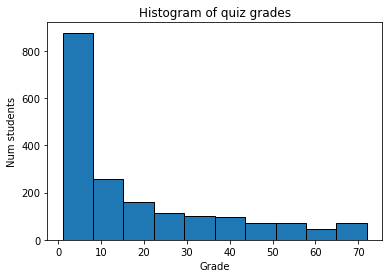

In [19]:
object_cols = churn_yes_df.select_dtypes(include = 'number').columns

hist = plt.hist(churn_yes_df['tenure'],  
                edgecolor='black')
plt.title('Histogram of quiz grades')
plt.xlabel('Grade')
plt.ylabel('Num students');

### Nhận xét:
    + Ta thấy với thời gian gắn bó ngắn (<10 tháng) thì sẽ tăng tỉ lệ churn
    + Ngược lại khi người dùng đã gắn bó lâu với dịch vụ thì tỉ lệ churn sẽ giảm.

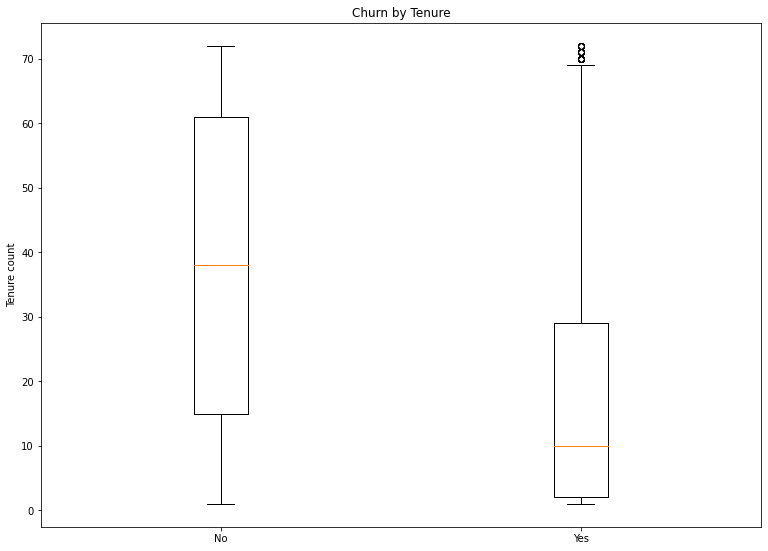

In [20]:

df_tenure = [df[df["Churn"] =='No']["tenure"],df[df["Churn"] =='Yes']["tenure"]]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
ax.boxplot(df_tenure)
plt.xticks([1, 2], ['No', 'Yes'])
ax.set_ylabel('Tenure count')
ax.set_title('Churn by Tenure')
# show plot
plt.show()

### Nhận xét 
    + Ở biểu đồ Churn by tennure ta thấy các khách hàng có thời gian sử dụng dịch vụ thấp (khách hàng mới) sẽ có xu hướng đổi dịch vụ

### Insight 2: Tác động làm giảm tỉ lệ Churn